In [2]:
import torch as t
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from utils import cmap, readAllData, readJson, show
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
data = readAllData('./data/idea_testing/')
data = data[0]['train']['input']
len(data)

10

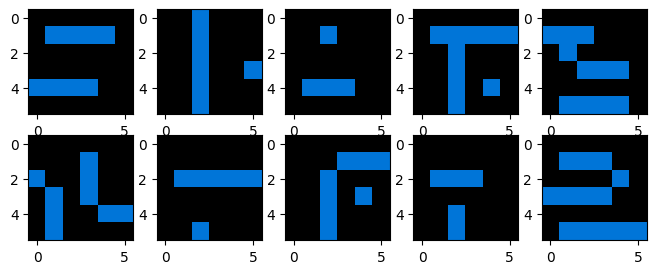

In [4]:
rows, cols = 2, 5 
_, ax = plt.subplots(rows, cols, figsize=(8, 3))

for c in range(cols):
    for r in range(rows):
        show(data[c * 2 + r], ax[r, c])

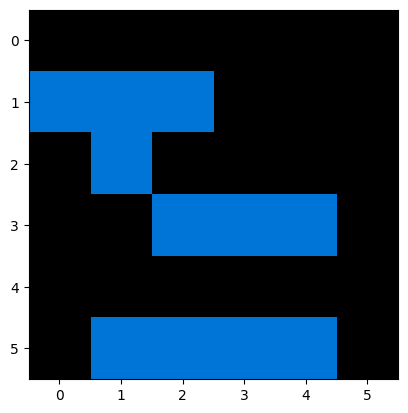

In [5]:
img = data[8]
show(img)

In [6]:
non_zero_rows, non_zero_cols = np.where(img > 0)

In [20]:
class Node:
    def __init__(self, row, col, value):
        self.row = row
        self.col = col
        self.value = value
        self.neighbours = []
        self.is_visited = False

In [25]:
visited = np.zeros_like(img, dtype=bool)

neighbours = [ (1, 0), (-1, 0), (0, 1), (0, -1) ]

def dfsFloodFill(i, j, prev_node=None):
    if i < 0 or i >= img.shape[0] or j < 0 or j >= img.shape[1]: return
    if img[i, j] == 0: return
    if visited[i, j]: return
    visited[i, j] = True

    node = Node(i, j, img[i, j])
    if prev_node:
        node.neighbours.append(prev_node)
        prev_node.neighbours.append(node)

    for dx, dy in neighbours:
        dfsFloodFill(i + dx, j + dy, node)

    if not prev_node:
        return node

graphs = []

for i, j in zip(non_zero_rows, non_zero_cols):
    if not visited[i, j]:
        graphs.append(dfsFloodFill(i, j))

In [26]:
def reset(node):
    if not node.is_visited: return
    node.is_visited = False
    for n in node.neighbours:
        reset(n)

In [29]:
def dfs(node, prev_node=None, ax=None):
    if node.is_visited: return

    node.is_visited = True

    if ax:
        ax.add_patch(patches.Circle((node.col, node.row), 0.05, fill=True, color='white'))
        if prev_node:
            ax.add_patch(patches.ConnectionPatch((prev_node.col, prev_node.row), (node.col, node.row), 
                                                 'data', 
                                                 'data', 
                                                 arrowstyle='->', 
                                                 color='white',
                                                 shrinkA=5, 
                                                 shrinkB=5, 
                                                 mutation_scale=5))

    for n in node.neighbours:
        dfs(n, node, ax)

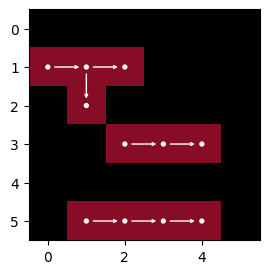

In [30]:
_, ax = plt.subplots(1, 1, figsize=(3,3))

ax.imshow(img, cmap=cmap)
for g in graphs:
    reset(g)
    dfs(g, None, ax)

plt.show()